In [8]:
from glob import glob
import pandas as pd

In [9]:
files = glob('../data/out/**/*.nq')

In [10]:
len(files)

194

In [11]:
files[:2]

['../data/out/2019/dpef.html-mf-hcard.nq-01058.nq',
 '../data/out/2019/dpef.html-mf-hcard.nq-00689.nq']

In [13]:
files = pd.DataFrame([(f, int(f.split('/')[3]), f.split('/')[4].replace('.nq', '')) for f in files], 
             columns=['path', 'year', 'id'])

In [14]:
files.year.value_counts()

2019    106
2020     66
2021     22
Name: year, dtype: int64

In [16]:
def line_count(fpath):
    with open(fpath) as f:
        return len(list(f))

files['line_count'] = [line_count(f) for f in files.path]

In [27]:
files['has_nq'] = files.line_count != 0

<AxesSubplot: >

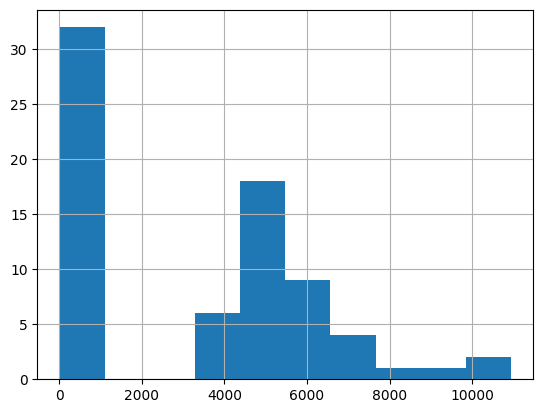

In [28]:
files[files.has_nq].line_count.hist()

In [38]:
def error_count(fpath):
    with open(fpath) as f:
        part_count = {k: 0 for k in range(6)}
        for l in f:
            parts = l.split('\t')
            part_count[len(parts)] += 1
            
        return fpath, part_count

[error_count(f) for f in files[files.has_nq].path]

KeyError: 11

In [33]:
def subject_count(fpath):
    with open(fpath) as f:
        subjects = []
        for l in f:
            parts = l.split('\t')
            if len(parts) >= 3, f'found {len(parts)} in {l}'
            subjects.append(parts[0])
        return len(set(subjects))

[subject_count(f) for f in files[files.has_nq].path]

AssertionError: found 1 in By Jack Barnes
